<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap10/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-6mf5ac9l
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-6mf5ac9l
     |████████████████████████████████| 634kB 27.4MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64574 sha256=b685639f598561f14e678285c702dda9d6932fc569856f6d4f4eec6888eabec7
  Stored in directory: /tmp/pip-ephem-wheel-cache-vs2zxs5l/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=65123aca91b5490486a319147b5235c3a73493df911c8225b3b6707473fa37a2
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
 

In [24]:
# mount gdrive and unzip data
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Mounted at /content/gdrive


In [25]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap10/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap10
Trial.ipynb
evaluate.py
gradcam.py
load_data.py
model.py
show_images.py
train_test.py
__init__.py
transforms.py
lr_finder.py
cifar-10-python.tar.gz
test_batch
data_batch_3
data_batch_2
data_batch_5
data_batch_1
data_batch_4
batches.meta
readme.html


In [3]:
%matplotlib inline
import torch
from template import load_data
from template import show_images
from template import model
from template import train_test
from template import evaluate
from template import transforms
from template import gradcam
from template import lr_finder

  pip install torch-lr-finder -v --global-option="amp"


In [0]:
import albumentations as A
train_transform_list = [
                          A.Rotate((-30.0, 30.0)),
                          A.HorizontalFlip(),
                          A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
                          A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1) # fillvalue is 0 after normalizing as mean is 0
                       ]
test_transform_list = [A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))]
train_transform = transforms.AlbumentationTransforms(train_transform_list)
test_transform = transforms.AlbumentationTransforms(test_transform_list)

In [5]:
classes, trainloader, testloader = load_data.load(train_transform,test_transform)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


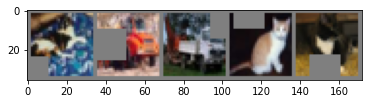

In [6]:
show_images.show_images(trainloader, classes)

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR , MultiStepLR, ReduceLROnPlateau
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.030801468927248762,momentum=0.9 ,weight_decay = 0.0005)
#scheduler = StepLR(optimizer, step_size=12, gamma=0.1)
scheduler = ReduceLROnPlateau(optimizer, patience = 8)

In [9]:
testLoss = []
testAcc = []
EPOCHS = 50
#best_acc1 = 10
for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
     scheduler.step(test_loss[-1])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.030801468927248762


Loss=1.425430178642273 Batch_id=390 Accuracy=41.51: 100%|██████████| 391/391 [00:53<00:00,  7.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0102, Accuracy: 5454/10000 (54.54%)

EPOCH: 2 LR: 0.030801468927248762


Loss=1.4036247730255127 Batch_id=390 Accuracy=56.76: 100%|██████████| 391/391 [00:54<00:00,  7.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6455/10000 (64.55%)

EPOCH: 3 LR: 0.030801468927248762


Loss=0.9201118350028992 Batch_id=390 Accuracy=64.56: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 7004/10000 (70.04%)

EPOCH: 4 LR: 0.030801468927248762


Loss=0.7342081069946289 Batch_id=390 Accuracy=69.20: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7328/10000 (73.28%)

EPOCH: 5 LR: 0.030801468927248762


Loss=0.6638437509536743 Batch_id=390 Accuracy=72.28: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7709/10000 (77.09%)

EPOCH: 6 LR: 0.030801468927248762


Loss=0.593816876411438 Batch_id=390 Accuracy=74.01: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7819/10000 (78.19%)

EPOCH: 7 LR: 0.030801468927248762


Loss=0.7350894212722778 Batch_id=390 Accuracy=76.08: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7575/10000 (75.75%)

EPOCH: 8 LR: 0.030801468927248762


Loss=0.6743477582931519 Batch_id=390 Accuracy=77.16: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8163/10000 (81.63%)

EPOCH: 9 LR: 0.030801468927248762


Loss=0.6602861881256104 Batch_id=390 Accuracy=78.58: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8217/10000 (82.17%)

EPOCH: 10 LR: 0.030801468927248762


Loss=0.762846052646637 Batch_id=390 Accuracy=79.48: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8320/10000 (83.20%)

EPOCH: 11 LR: 0.030801468927248762


Loss=0.5932000875473022 Batch_id=390 Accuracy=80.49: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8504/10000 (85.04%)

EPOCH: 12 LR: 0.030801468927248762


Loss=0.6105022430419922 Batch_id=390 Accuracy=81.68: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8495/10000 (84.95%)

EPOCH: 13 LR: 0.030801468927248762


Loss=0.601116418838501 Batch_id=390 Accuracy=82.01: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8580/10000 (85.80%)

EPOCH: 14 LR: 0.030801468927248762


Loss=0.6542776823043823 Batch_id=390 Accuracy=82.88: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8490/10000 (84.90%)

EPOCH: 15 LR: 0.030801468927248762


Loss=0.3153034448623657 Batch_id=390 Accuracy=83.19: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8480/10000 (84.80%)

EPOCH: 16 LR: 0.030801468927248762


Loss=0.3206314742565155 Batch_id=390 Accuracy=83.73: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8570/10000 (85.70%)

EPOCH: 17 LR: 0.030801468927248762


Loss=0.41593870520591736 Batch_id=390 Accuracy=84.20: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8522/10000 (85.22%)

EPOCH: 18 LR: 0.030801468927248762


Loss=0.38264864683151245 Batch_id=390 Accuracy=84.37: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8603/10000 (86.03%)

EPOCH: 19 LR: 0.030801468927248762


Loss=0.48788291215896606 Batch_id=390 Accuracy=85.18: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8728/10000 (87.28%)

EPOCH: 20 LR: 0.030801468927248762


Loss=0.4052831530570984 Batch_id=390 Accuracy=85.29: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8439/10000 (84.39%)

EPOCH: 21 LR: 0.030801468927248762


Loss=0.38216787576675415 Batch_id=390 Accuracy=85.55: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8540/10000 (85.40%)

EPOCH: 22 LR: 0.030801468927248762


Loss=0.4355684816837311 Batch_id=390 Accuracy=85.67: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8793/10000 (87.93%)

EPOCH: 23 LR: 0.030801468927248762


Loss=0.5223349928855896 Batch_id=390 Accuracy=85.97: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8875/10000 (88.75%)

EPOCH: 24 LR: 0.030801468927248762


Loss=0.40034914016723633 Batch_id=390 Accuracy=86.36: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8894/10000 (88.94%)

EPOCH: 25 LR: 0.030801468927248762


Loss=0.28882354497909546 Batch_id=390 Accuracy=86.61: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8540/10000 (85.40%)

EPOCH: 26 LR: 0.030801468927248762


Loss=0.29643514752388 Batch_id=390 Accuracy=86.99: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8758/10000 (87.58%)

EPOCH: 27 LR: 0.030801468927248762


Loss=0.4219655990600586 Batch_id=390 Accuracy=86.90: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8755/10000 (87.55%)

EPOCH: 28 LR: 0.030801468927248762


Loss=0.3568367660045624 Batch_id=390 Accuracy=87.29: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8832/10000 (88.32%)

EPOCH: 29 LR: 0.030801468927248762


Loss=0.27241453528404236 Batch_id=390 Accuracy=87.03: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8818/10000 (88.18%)

EPOCH: 30 LR: 0.030801468927248762


Loss=0.3885580897331238 Batch_id=390 Accuracy=87.20: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8830/10000 (88.30%)

EPOCH: 31 LR: 0.030801468927248762


Loss=0.4037550091743469 Batch_id=390 Accuracy=87.25: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8579/10000 (85.79%)

EPOCH: 32 LR: 0.030801468927248762


Loss=0.2821682393550873 Batch_id=390 Accuracy=87.61: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8915/10000 (89.15%)

EPOCH: 33 LR: 0.030801468927248762


Loss=0.4995431900024414 Batch_id=390 Accuracy=87.55: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8691/10000 (86.91%)

EPOCH: 34 LR: 0.030801468927248762


Loss=0.3393990993499756 Batch_id=390 Accuracy=87.92: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8965/10000 (89.65%)

EPOCH: 35 LR: 0.030801468927248762


Loss=0.5213149785995483 Batch_id=390 Accuracy=87.94: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8864/10000 (88.64%)

EPOCH: 36 LR: 0.030801468927248762


Loss=0.4419350028038025 Batch_id=390 Accuracy=87.81: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8955/10000 (89.55%)

EPOCH: 37 LR: 0.030801468927248762


Loss=0.2914782166481018 Batch_id=390 Accuracy=88.27: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8629/10000 (86.29%)

EPOCH: 38 LR: 0.030801468927248762


Loss=0.41785940527915955 Batch_id=390 Accuracy=88.20: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8828/10000 (88.28%)

EPOCH: 39 LR: 0.030801468927248762


Loss=0.3989184498786926 Batch_id=390 Accuracy=88.22: 100%|██████████| 391/391 [00:56<00:00,  6.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8836/10000 (88.36%)

EPOCH: 40 LR: 0.030801468927248762


Loss=0.3061675429344177 Batch_id=390 Accuracy=88.25: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8938/10000 (89.38%)

EPOCH: 41 LR: 0.030801468927248762


Loss=0.3535795211791992 Batch_id=390 Accuracy=88.33: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8987/10000 (89.87%)

EPOCH: 42 LR: 0.030801468927248762


Loss=0.389866441488266 Batch_id=390 Accuracy=88.56: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8847/10000 (88.47%)

EPOCH: 43 LR: 0.030801468927248762


Loss=0.26597270369529724 Batch_id=390 Accuracy=88.46: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8949/10000 (89.49%)

EPOCH: 44 LR: 0.030801468927248762


Loss=0.6558846235275269 Batch_id=390 Accuracy=88.64: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8847/10000 (88.47%)

EPOCH: 45 LR: 0.030801468927248762


Loss=0.3075878322124481 Batch_id=390 Accuracy=88.87: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9013/10000 (90.13%)

EPOCH: 46 LR: 0.030801468927248762


Loss=0.32334721088409424 Batch_id=390 Accuracy=89.24: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8747/10000 (87.47%)

EPOCH: 47 LR: 0.030801468927248762


Loss=0.3071315884590149 Batch_id=390 Accuracy=88.87: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8988/10000 (89.88%)

EPOCH: 48 LR: 0.030801468927248762


Loss=0.4453955590724945 Batch_id=390 Accuracy=89.13: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8936/10000 (89.36%)

EPOCH: 49 LR: 0.030801468927248762


Loss=0.32802218198776245 Batch_id=390 Accuracy=89.08: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8964/10000 (89.64%)

EPOCH: 50 LR: 0.030801468927248762


Loss=0.21435800194740295 Batch_id=390 Accuracy=89.22: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]



Test set: Average loss: 0.0025, Accuracy: 8967/10000 (89.67%)



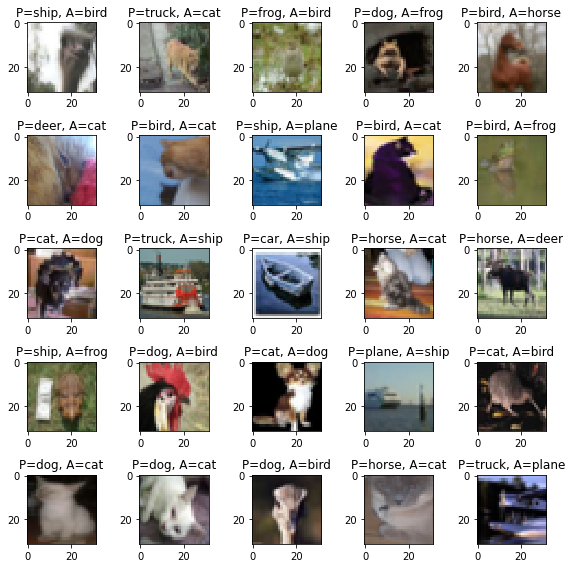

In [26]:
misclassified_images = evaluate.show_misclassified_images(model, device, testloader, classes)

In [17]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 89 %


In [18]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 81 %
Accuracy of   car : 91 %
Accuracy of  bird : 88 %
Accuracy of   cat : 65 %
Accuracy of  deer : 92 %
Accuracy of   dog : 77 %
Accuracy of  frog : 92 %
Accuracy of horse : 84 %
Accuracy of  ship : 88 %
Accuracy of truck : 100 %


In [0]:
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)

Text(0.5, 1.0, 'Test Accuracy')

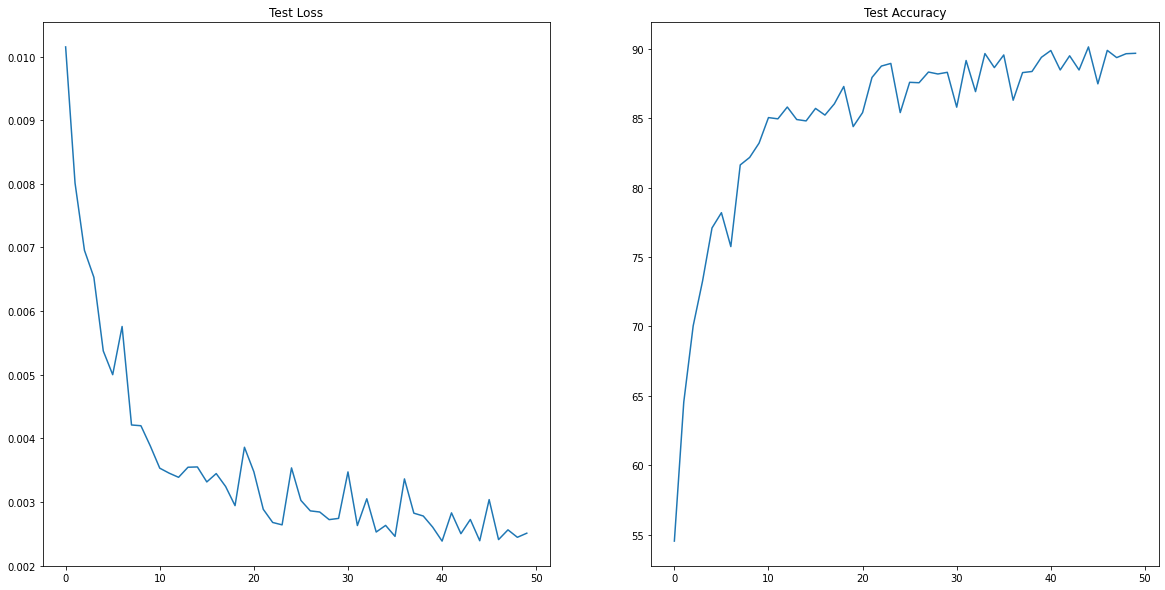

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(test_loss)
axs[0].set_title("Test Loss")


axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


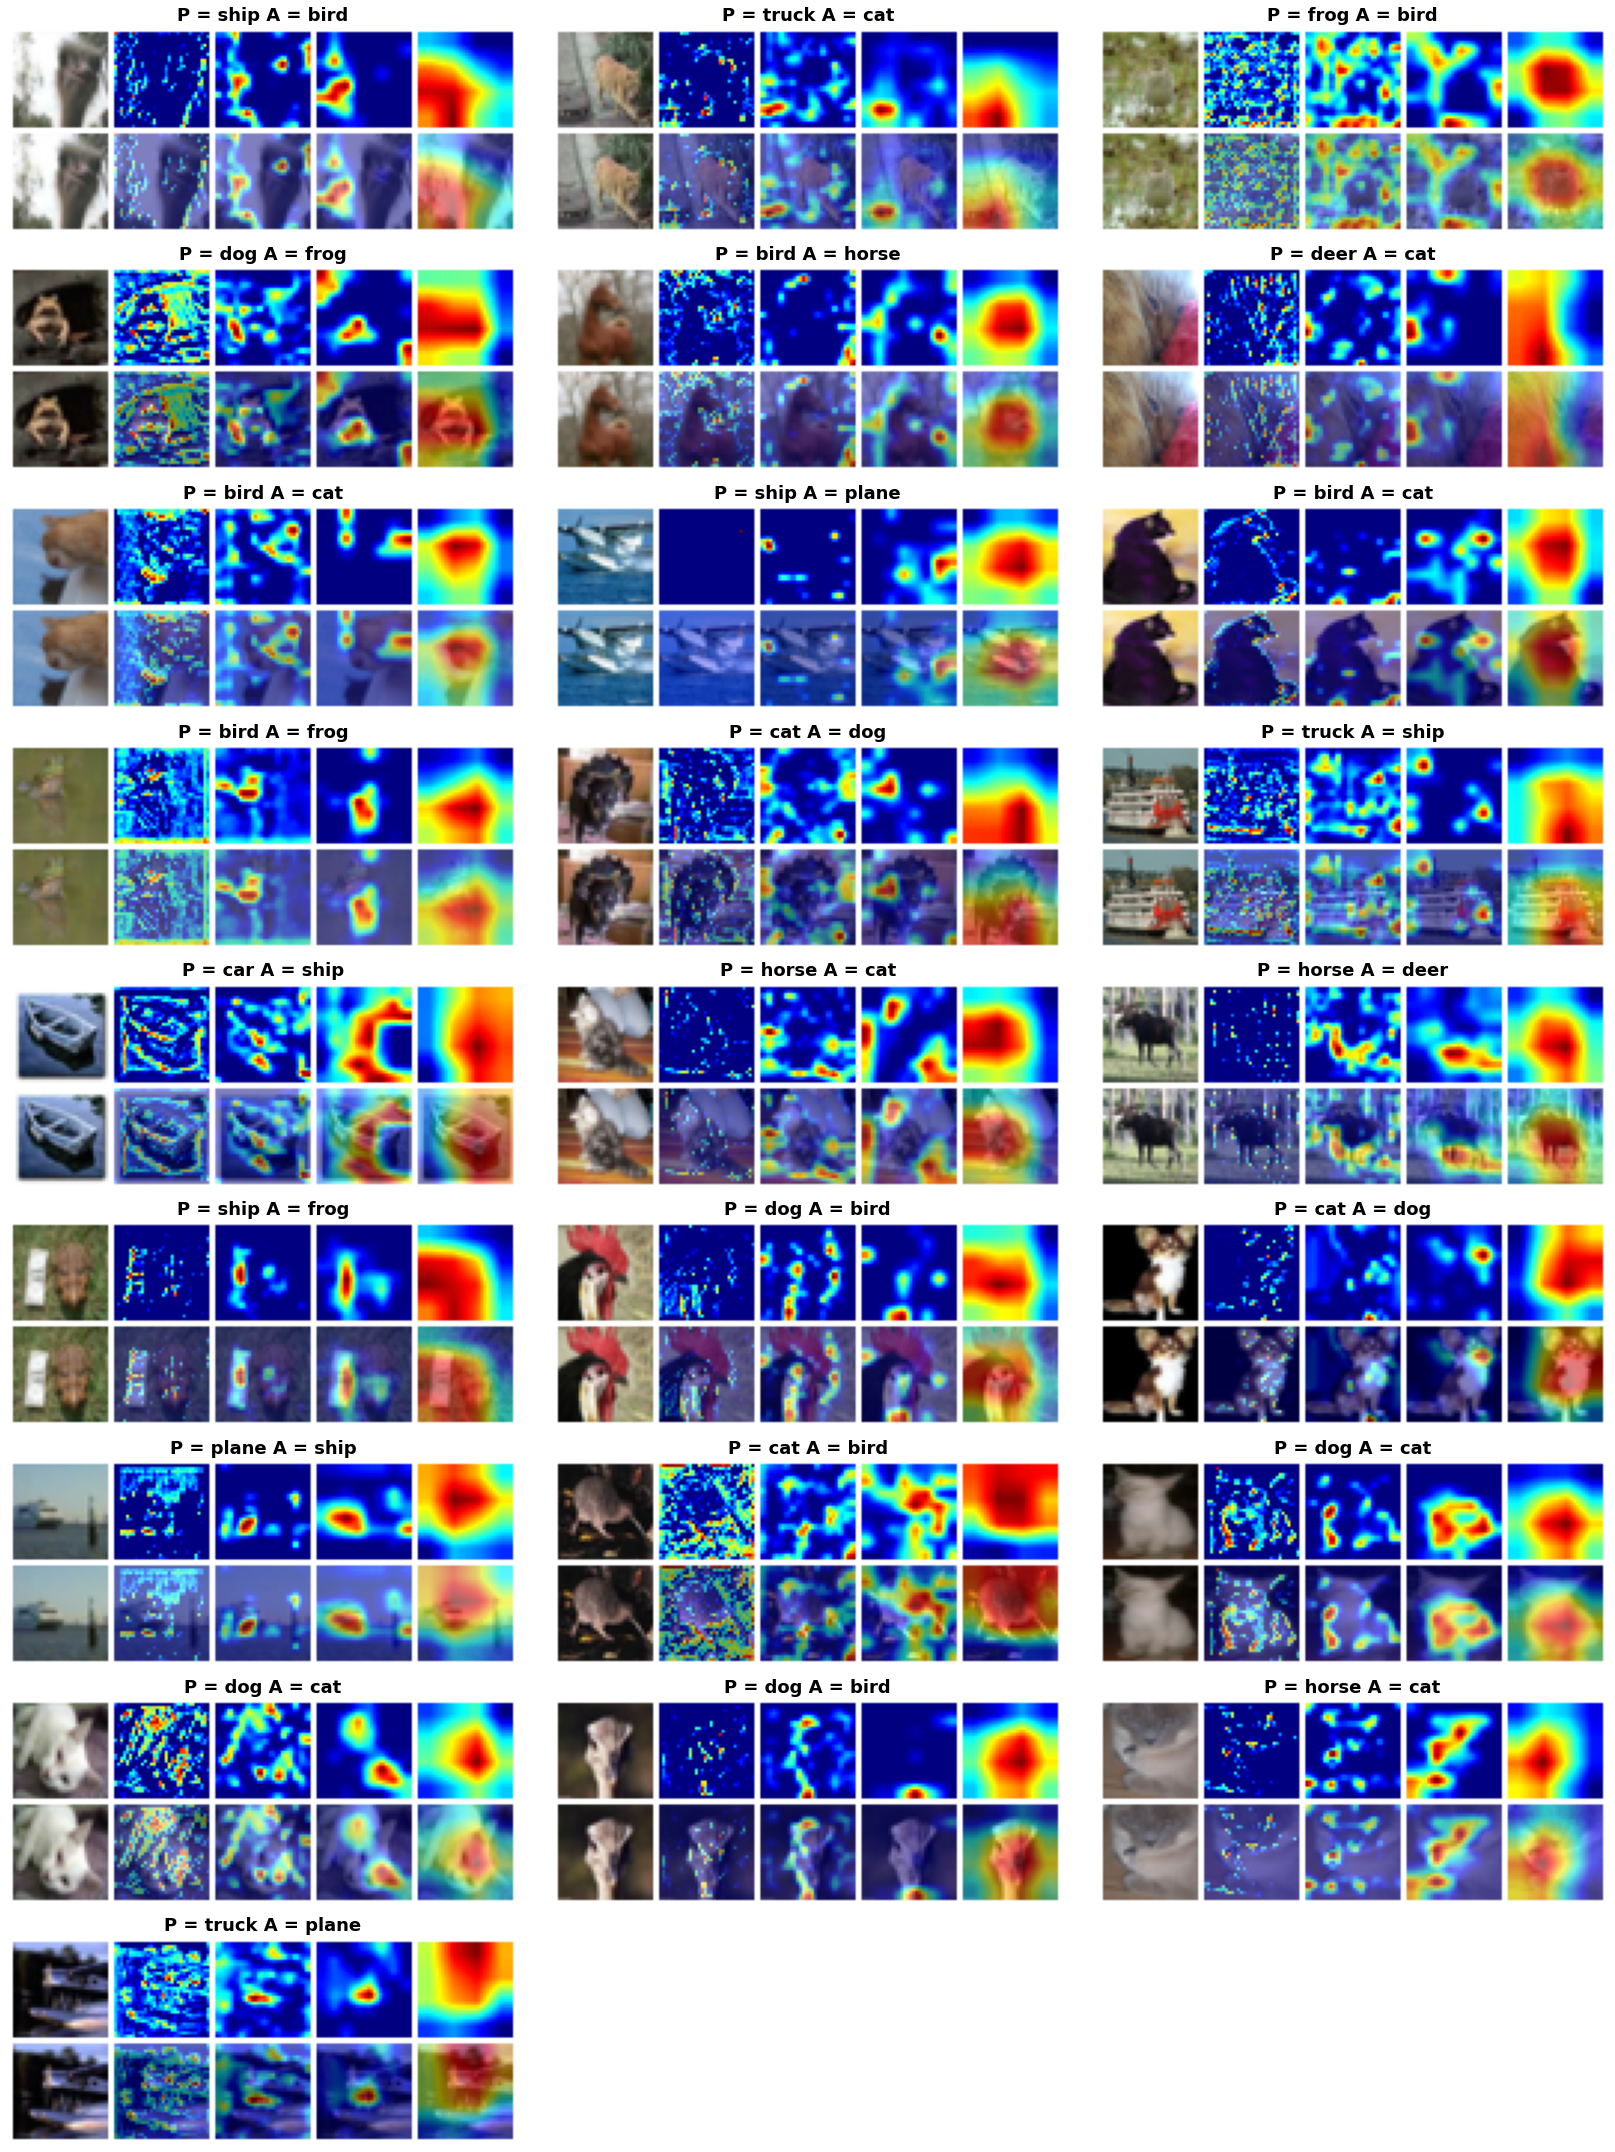

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from torchvision.utils import make_grid, save_image
fig = plt.figure(figsize=(23,30))
for i,k in enumerate(misclassified_images):
  images1 = [misclassified_images[i][0].cpu()/2+0.5]
  images2 =  [misclassified_images[i][0].cpu()/2+0.5]
  b = model.to(device)
  # output = model(misclassified_images[i][0])
  # _, predicted = torch.max(output.data, 1)
  #print(classes[int(predicted)])
  layers =  [model.layer1,model.layer2,model.layer3,model.layer4]
  for j in layers:
    g = gradcam.GradCAM(b,j)
    mask, _= g(misclassified_images[i][0].clone().unsqueeze_(0))
    heatmap, result = gradcam.visualize_cam(mask,misclassified_images[i][0].clone().unsqueeze_(0)/2+0.5 )
    images1.extend([heatmap])
    images2.extend([result])
  grid_image = make_grid(images1+images2,nrow=5,pad_value=1)
  npimg = grid_image.numpy()
  sub = fig.add_subplot(9, 3, i+1) 
 
  # fig.subplots_adjust(wspace=0)
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  sub.set_title('P = '+classes[int(misclassified_images[i][1])]+" A = "+classes[int(misclassified_images[i][2])],fontweight="bold",fontsize=18)
  sub.axis("off")
plt.tight_layout()
fig.subplots_adjust(wspace=0)

In [31]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR , MultiStepLR

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=0.00001)
#scheduler = StepLR(optimizer, step_size=12, gamma=0.1)
lrfinder = lr_finder.LRFinder(model, optimiser, criterion, device="cuda")
lrfinder.range_test(trainloader, val_loader=testloader, end_lr=10, num_iter=700 ,step_mode="exp")

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


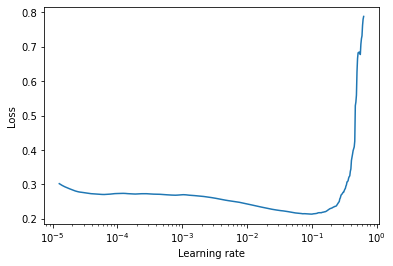

In [32]:
lrfinder.plot()

In [0]:
lrfinder.reset()

In [34]:
lrfinder.history['lr'][lrfinder.history['loss'].index(lrfinder.best_loss)]

0.1006600502486077